In [1]:
import os
import pandas as pd
import random
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
combined_df = pd.read_csv('pred_probs_combined3.csv')
summaries_df = pd.read_csv('pred_probs_summaries3.csv')

In [3]:
combined_df.shape

(599990, 1)

In [4]:
summaries_df.shape

(599990, 1)

In [5]:
combined = combined_df['Probability of positive']
summaries = summaries_df['Probability of positive']

In [6]:
test_df = pd.read_csv('reviews_test_with_sentiment.csv')
test = test_df['sentiment']

In [7]:
test_df.shape

(599990, 2)

In [8]:
from sklearn.metrics import roc_curve
combined_fpr, combined_tpr, _ = roc_curve(test, combined)
summaries_fpr, summaries_tpr, _ = roc_curve(test, summaries)

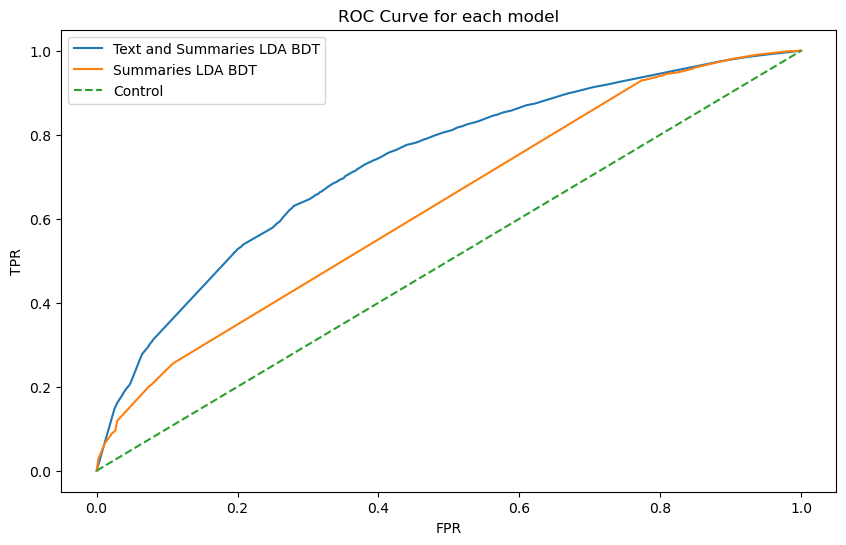

In [9]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(combined_fpr, combined_tpr, label='Text and Summaries LDA BDT')
plt.plot(summaries_fpr, summaries_tpr, label='Summaries LDA BDT')
plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()

In [31]:
combined_df50k = pd.read_csv('pred_probs_combined_50k150.csv')
summaries_df50k = pd.read_csv('pred_probs_summaries_50k150.csv')
combined50k = combined_df50k['Probability of positive']
summaries50k = summaries_df50k['Probability of positive']
test_df50k = pd.read_csv('test_sentiments_50k.csv')
test50k = test_df50k['sentiment']
combined_fpr50k, combined_tpr50k, _ = roc_curve(test50k, combined50k)
summaries_fpr50k, summaries_tpr50k, _ = roc_curve(test50k, summaries50k)

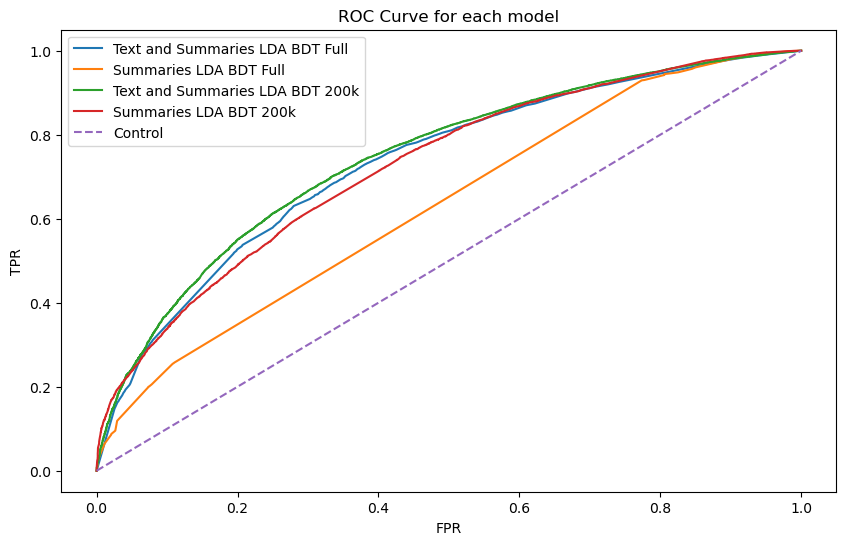

In [32]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(combined_fpr, combined_tpr, label='Text and Summaries LDA BDT Full')
plt.plot(summaries_fpr, summaries_tpr, label='Summaries LDA BDT Full')
plt.plot(combined_fpr50k, combined_tpr50k, label='Text and Summaries LDA BDT 200k')
plt.plot(summaries_fpr50k, summaries_tpr50k, label='Summaries LDA BDT 200k')
plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()

In [17]:
combined_df150 = pd.read_csv('pred_probs_combined150.csv')
summaries_df150 = pd.read_csv('pred_probs_summaries150.csv')
combined150 = combined_df150['Probability of positive']
summaries150 = summaries_df150['Probability of positive']
combined_fpr150, combined_tpr150, _ = roc_curve(test, combined150)
summaries_fpr150, summaries_tpr150, _ = roc_curve(test, summaries150)

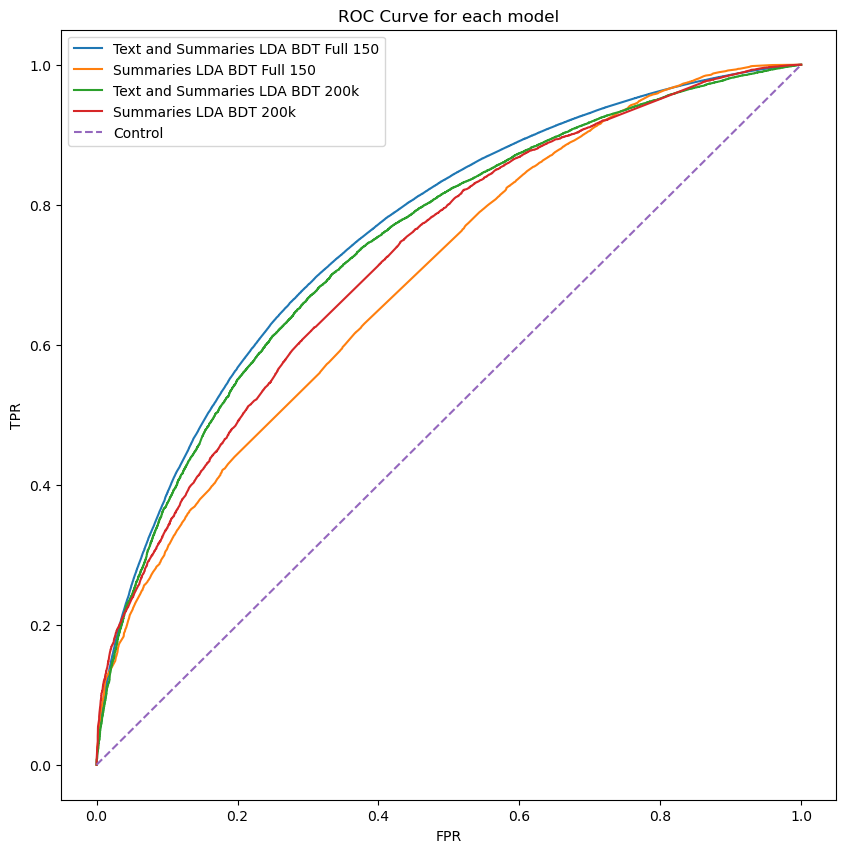

In [23]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,10))
plt.plot(combined_fpr150, combined_tpr150, label='Text and Summaries LDA BDT Full 150')
plt.plot(summaries_fpr150, summaries_tpr150, label='Summaries LDA BDT Full 150')
plt.plot(combined_fpr50k, combined_tpr50k, label='Text and Summaries LDA BDT 200k')
plt.plot(summaries_fpr50k, summaries_tpr50k, label='Summaries LDA BDT 200k')
plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()

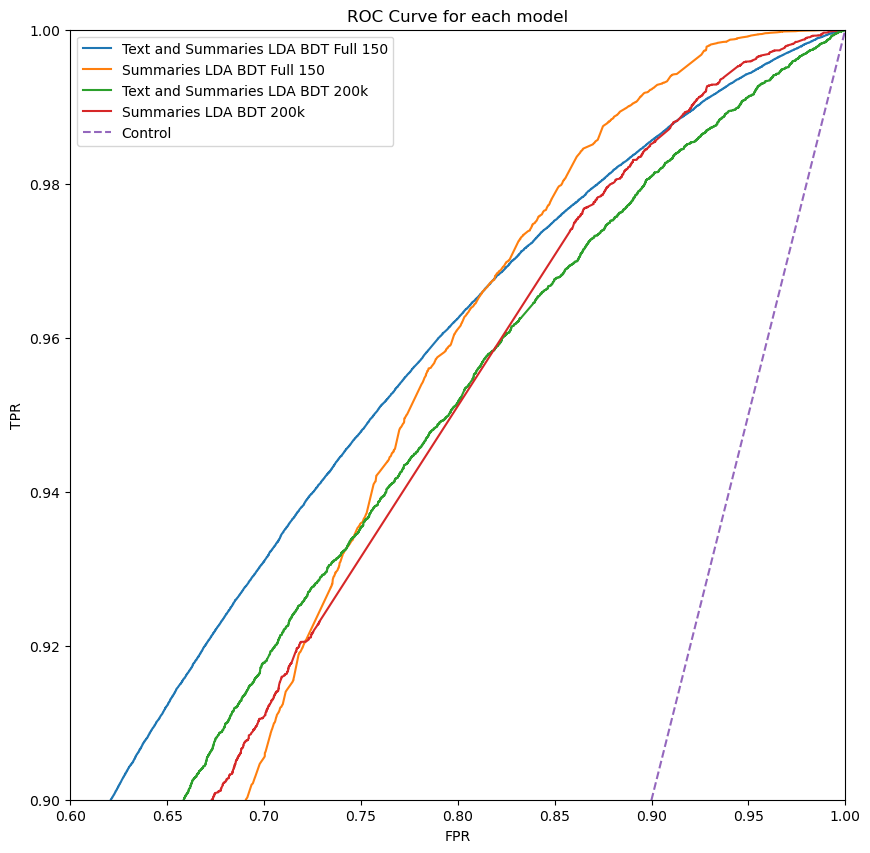

In [24]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,10))
plt.plot(combined_fpr150, combined_tpr150, label='Text and Summaries LDA BDT Full 150')
plt.plot(summaries_fpr150, summaries_tpr150, label='Summaries LDA BDT Full 150')
plt.plot(combined_fpr50k, combined_tpr50k, label='Text and Summaries LDA BDT 200k')
plt.plot(summaries_fpr50k, summaries_tpr50k, label='Summaries LDA BDT 200k')
plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.axis([0.6,1,0.9,1])
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import precision_recall_curve
combined_pre150, combined_rec150, combined_thr150 = precision_recall_curve(test, combined150)
summaries_pre150, summaries_rec150, summaries_thr150 = precision_recall_curve(test, summaries150)
combined_pre50k, combined_rec50k, combined_thr50k = precision_recall_curve(test50k, combined50k)
summaries_pre50k, summaries_rec50k, summaries_thr50k = precision_recall_curve(test50k, summaries50k)

In [27]:
control_val = test.value_counts()[1] / len(test)

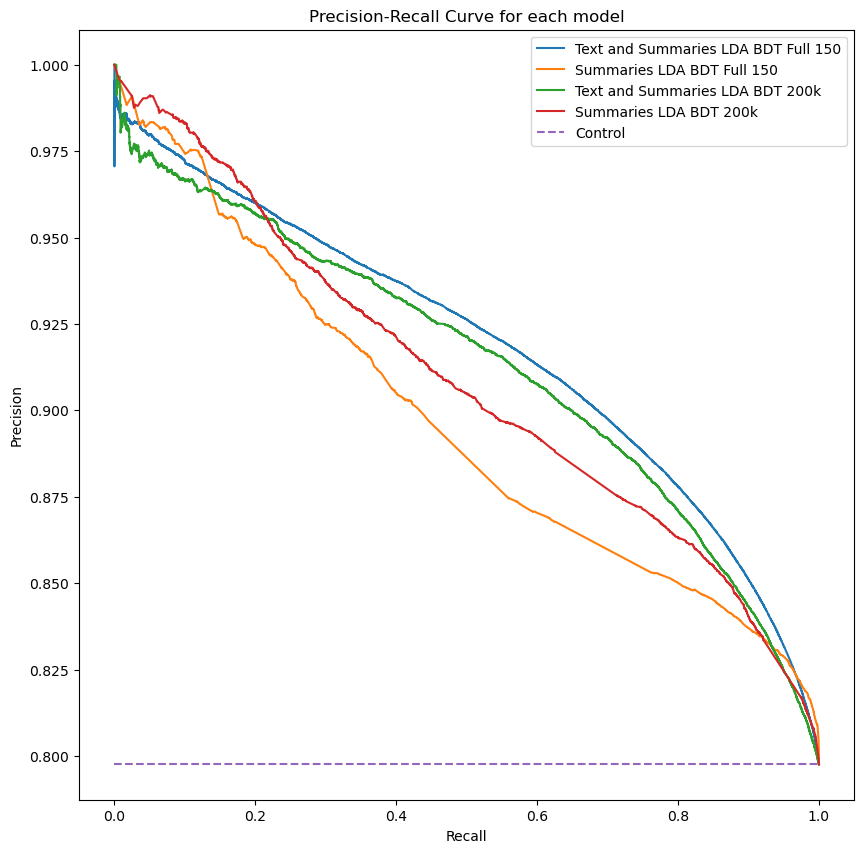

In [30]:
x=[0,1]
y=[control_val, control_val]
plt.figure(figsize=(10,10))
plt.plot(combined_rec150, combined_pre150, label='Text and Summaries LDA BDT Full 150')
plt.plot(summaries_rec150, summaries_pre150, label='Summaries LDA BDT Full 150')
plt.plot(combined_rec50k, combined_pre50k, label='Text and Summaries LDA BDT 200k')
plt.plot(summaries_rec50k, summaries_pre50k, label='Summaries LDA BDT 200k')

plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each model')
plt.legend()
plt.show()

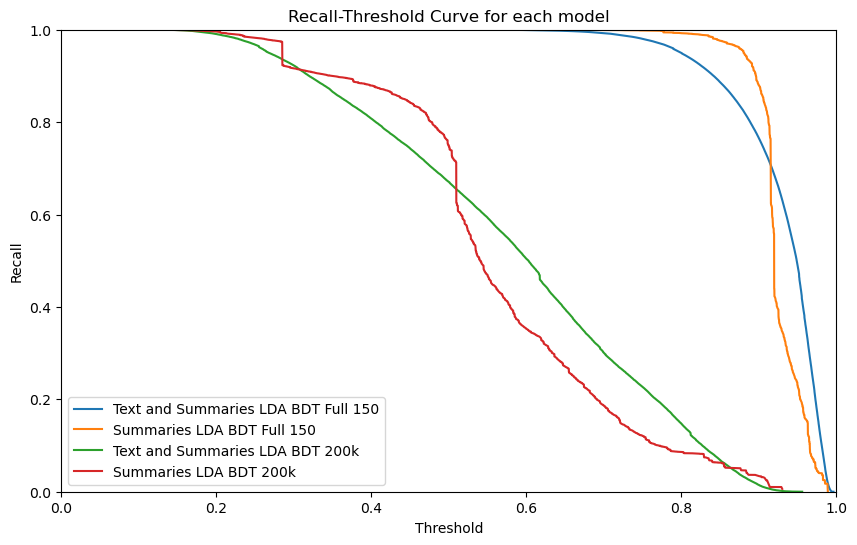

In [34]:
plt.figure(figsize=(10,6))
plt.plot(combined_thr150, combined_rec150[0:len(combined_rec150)-1], label='Text and Summaries LDA BDT Full 150')
plt.plot(summaries_thr150, summaries_rec150[0:len(summaries_rec150)-1], label='Summaries LDA BDT Full 150')
plt.plot(combined_thr50k, combined_rec50k[0:len(combined_rec50k)-1], label='Text and Summaries LDA BDT 200k')
plt.plot(summaries_thr50k, summaries_rec50k[0:len(summaries_rec50k)-1], label='Summaries LDA BDT 200k')

plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall-Threshold Curve for each model')
plt.legend()
plt.axis([0,1,0,1])
plt.show()

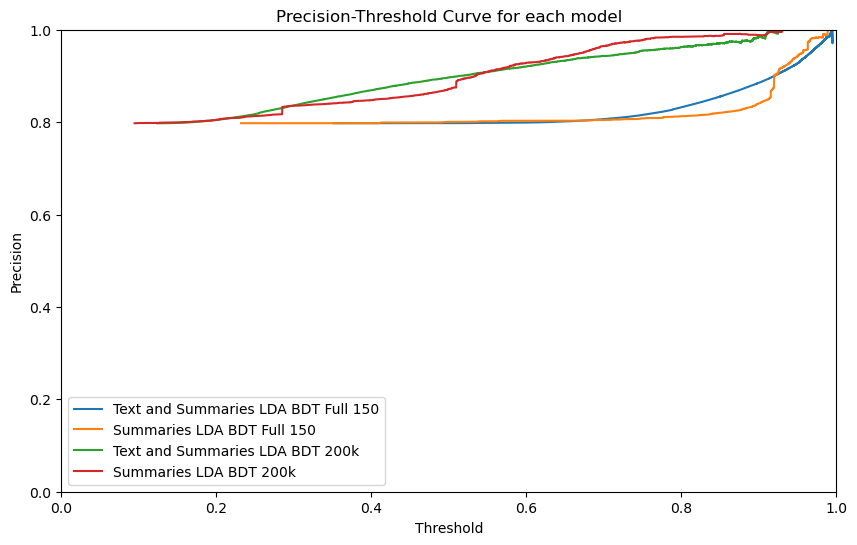

In [35]:
plt.figure(figsize=(10,6))
plt.plot(combined_thr150, combined_pre150[0:len(combined_rec150)-1], label='Text and Summaries LDA BDT Full 150')
plt.plot(summaries_thr150, summaries_pre150[0:len(summaries_rec150)-1], label='Summaries LDA BDT Full 150')
plt.plot(combined_thr50k, combined_pre50k[0:len(combined_rec50k)-1], label='Text and Summaries LDA BDT 200k')
plt.plot(summaries_thr50k, summaries_pre50k[0:len(summaries_rec50k)-1], label='Summaries LDA BDT 200k')

plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision-Threshold Curve for each model')
plt.legend()
plt.axis([0,1,0,1])
plt.show()